In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [8]:
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [9]:
print(data.describe())

                Time             V1             V2             V3  \
count  130802.000000  130802.000000  130802.000000  130802.000000   
mean    49788.355690      -0.245796       0.001574       0.676860   
std     20019.335232       1.823485       1.619337       1.276232   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     36926.250000      -1.016281      -0.575183       0.173437   
50%     51566.000000      -0.258119       0.093828       0.752911   
75%     66518.000000       1.158111       0.762659       1.367887   
max     79435.000000       1.960497      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  130802.000000  130802.000000  130802.000000  130802.000000   
mean        0.144168      -0.285630       0.080685      -0.117838   
std         1.328394       1.314929       1.284704       1.173648   
min        -5.172595     -42.147898     -26.160506     -31.764946   
25%        -0.714826      -0.9080

### **Analyzing Class Distribution**

In [10]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.001999387161023441
Fraud Cases: 261
Valid Transactions: 130540


**Exploring Transaction Amounts**

In [11]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,261.000000
mean,116.679693
std,246.300626
min,0.000000
25%,1.000000
50%,11.380000
75%,99.990000
max,1809.680000


In [12]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,130540.000000
mean,92.443479
std,250.815557
min,0.000000
25%,6.240000
50%,24.560000
75%,82.500000
max,19656.530000


Plotting Correlation Matrix

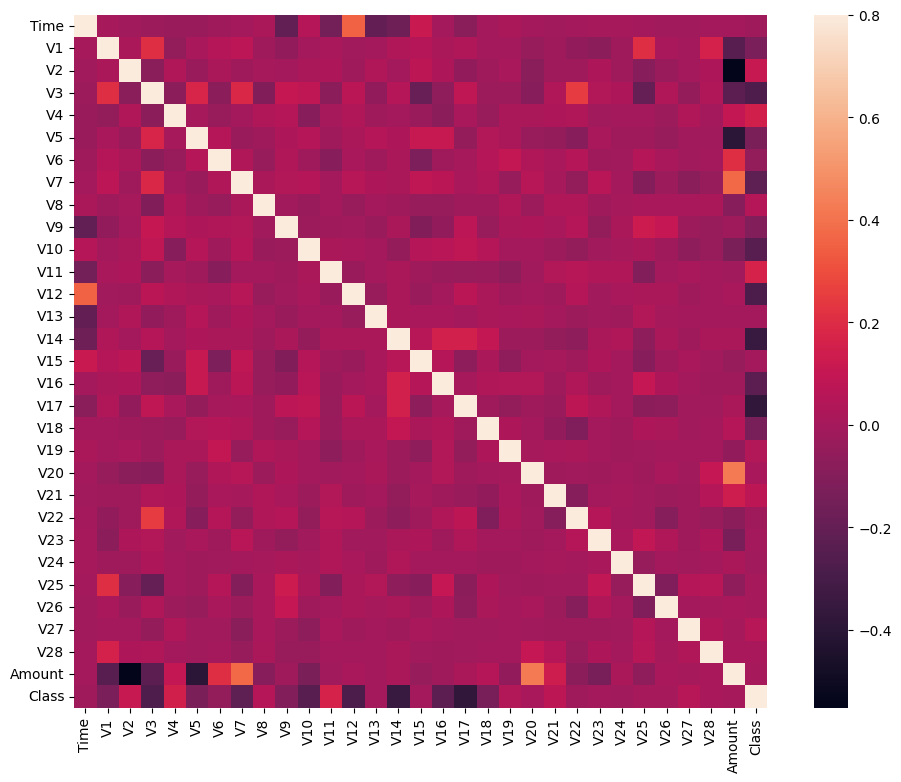

In [13]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Prepaing Data

In [7]:
import pandas as pd

data = pd.read_csv("creditcard.csv").dropna(subset=['Class'])
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values.astype(int) # Ensure yData is integer type for classification

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(9964, 30)
(9964,)


Building and Training the Model

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

Model Evaluation Metrics:
Accuracy: 0.9990
Precision: 1.0000
Recall: 0.7143
F1-Score: 0.8333
Matthews Correlation Coefficient: 0.8447


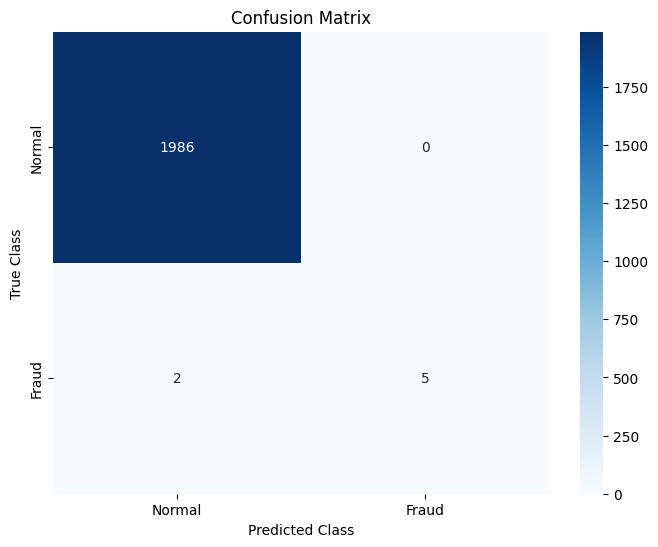

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Task
Perform additional analysis on the credit card fraud detection project, including feature importance, data visualization of important features, model evaluation with different metrics, addressing data imbalance, comparing different models, and hyperparameter tuning. Summarize the findings and provide insights.

## Feature importance analysis

### Subtask:
Identify the most important features in predicting fraudulent transactions using the trained RandomForestClassifier.


**Reasoning**:
Access the feature importances from the trained RandomForestClassifier, create a pandas Series with feature names as index, sort the features by importance, and display the result.



In [16]:
importances = rfc.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances (sorted):")
print(feature_importances)

Feature Importances (sorted):
V12       0.244747
V11       0.152853
V14       0.126363
V10       0.123896
V17       0.082520
V3        0.058726
V16       0.047665
V4        0.030934
V18       0.027160
V9        0.022127
V6        0.013109
V2        0.009955
V8        0.007774
V26       0.006175
V25       0.005568
V7        0.005364
V13       0.004643
Time      0.003980
V5        0.003464
V23       0.003374
V21       0.003130
V27       0.002839
V20       0.002225
Amount    0.001980
V28       0.001974
V22       0.001974
V1        0.001889
V24       0.001452
V15       0.001122
V19       0.001016
dtype: float64


**Reasoning**:
The error indicates that the `rfc` model was not defined in the current session. I need to rerun the code cell that trains the RandomForestClassifier model before I can access its feature importances.



In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

importances = rfc.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances (sorted):")
print(feature_importances)

Feature Importances (sorted):
V12       0.232968
V17       0.128680
V14       0.126255
V10       0.115772
V11       0.097639
V3        0.054986
V4        0.053701
V16       0.052054
V9        0.033337
V18       0.019005
V2        0.014679
V6        0.009079
V7        0.007238
V21       0.005587
V22       0.005429
V25       0.005396
V8        0.005168
V20       0.004063
V15       0.003148
V13       0.003095
V19       0.003089
V26       0.002976
V5        0.002944
V1        0.002846
Time      0.002576
Amount    0.002535
V27       0.001909
V23       0.001702
V24       0.001279
V28       0.000864
dtype: float64


**Reasoning**:
The error indicates that `xTrain` is not defined. This means the code cell that performs the train-test split was not executed in the current environment. I need to rerun that cell to define the training and testing data before training the model and calculating feature importances.



In [18]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

importances = rfc.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances (sorted):")
print(feature_importances)

(9964, 30)
(9964,)
Feature Importances (sorted):
V12       0.276647
V14       0.139027
V10       0.096539
V17       0.088715
V11       0.087010
V3        0.071195
V16       0.044054
V4        0.036015
V9        0.030551
V18       0.020930
V2        0.018145
V6        0.016953
V7        0.010502
V21       0.007180
V20       0.006881
Amount    0.006525
V27       0.005994
V25       0.005645
V24       0.004623
V5        0.004263
V23       0.004180
V26       0.003293
V13       0.003058
V22       0.002534
V28       0.002133
V1        0.002084
V8        0.001478
Time      0.001450
V19       0.001314
V15       0.001084
dtype: float64


**Reasoning**:
The error indicates that `data` is not defined. This means the code cell that loads the data was not executed in the current environment. I need to rerun that cell to load the data into the `data` DataFrame before proceeding with the train-test split, model training, and feature importance calculation.



In [20]:
import pandas as pd

data = pd.read_csv("creditcard.csv").dropna(subset=['Class'])

X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values.astype(int) # Ensure yData is integer type for classification

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

importances = rfc.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances (sorted):")
print(feature_importances)

(47627, 30)
(47627,)
Feature Importances (sorted):
V12       0.169954
V17       0.141901
V14       0.093404
V9        0.071708
V11       0.064087
V10       0.061398
V16       0.049433
V4        0.044711
V18       0.041710
V26       0.039398
V20       0.017294
V21       0.016431
V1        0.015600
V15       0.015243
V3        0.015017
V7        0.014913
V19       0.013607
V6        0.011881
V28       0.011875
V27       0.011712
Amount    0.010188
Time      0.009358
V22       0.008738
V8        0.008450
V2        0.007957
V24       0.007859
V13       0.007774
V5        0.007376
V25       0.007076
V23       0.003947
dtype: float64


In [22]:
data = pd.read_csv("creditcard.csv").dropna(subset=['Class'])

X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values.astype(int) # Ensure yData is integer type for classification

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

importances = rfc.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances (sorted):")
print(feature_importances)

(69414, 30)
(69414,)
Feature Importances (sorted):
V17       0.151883
V14       0.124048
V12       0.121172
V11       0.077213
V9        0.062844
V16       0.052931
V10       0.050748
V4        0.043222
V18       0.043004
V26       0.041086
V20       0.021261
V7        0.018247
V6        0.015244
V28       0.014515
V3        0.014158
V2        0.013766
V22       0.012417
V21       0.011260
V8        0.011250
V15       0.011025
Time      0.010830
V27       0.010827
V24       0.010187
V1        0.009770
V19       0.009754
V5        0.009569
Amount    0.009339
V25       0.007733
V13       0.007410
V23       0.003288
dtype: float64


## Data visualization of important features

### Subtask:
Create visualizations (e.g., box plots, histograms) to compare the distributions of important features for fraudulent and valid transactions.


**Reasoning**:
Select the top 3 important features and create visualizations (box plots and histograms) to compare their distributions for fraudulent and valid transactions.



Top 3 important features: ['V17', 'V14', 'V12']


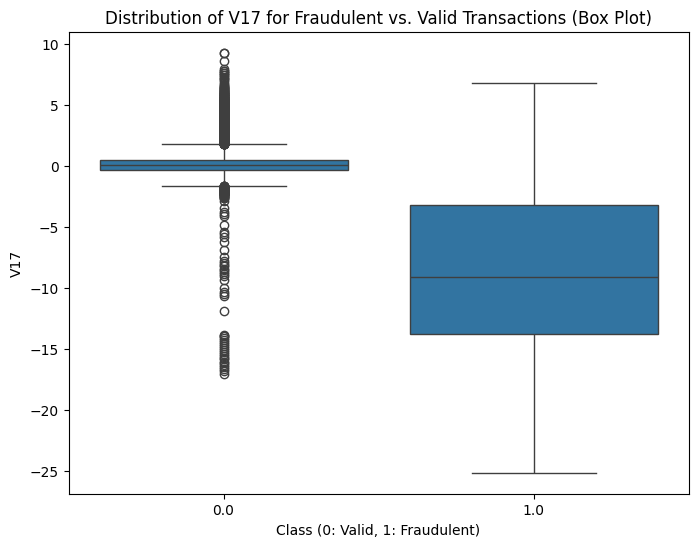

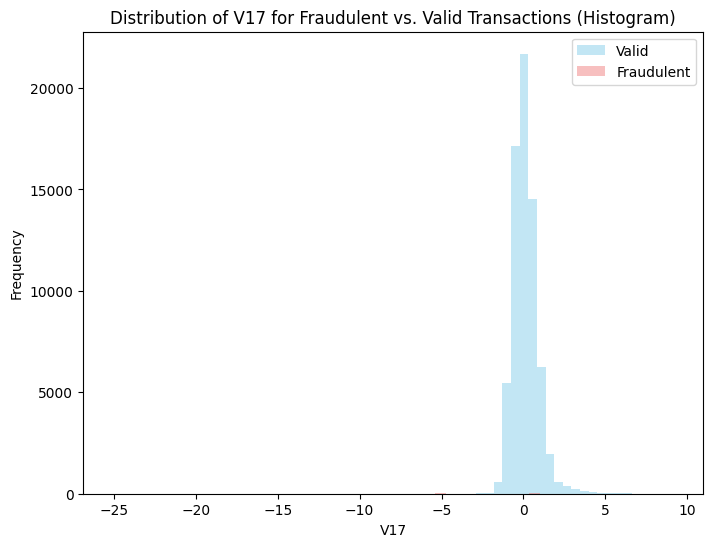

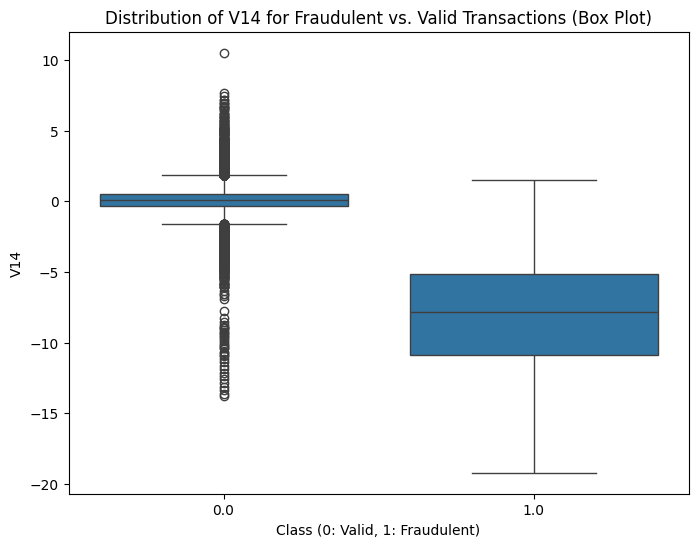

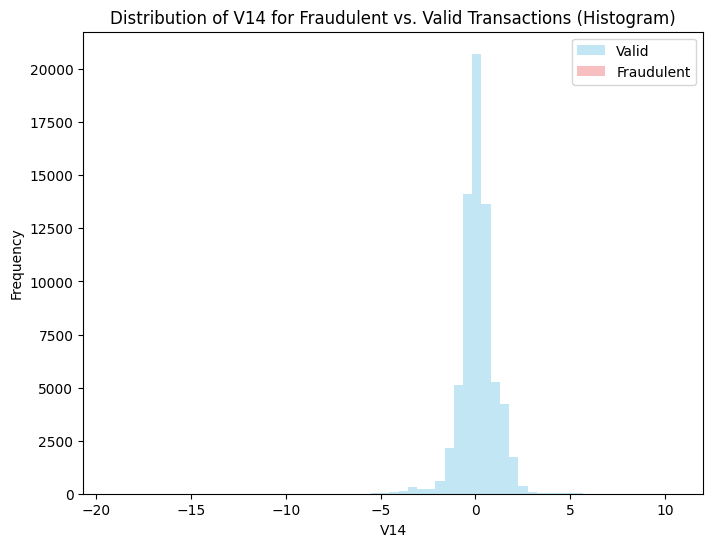

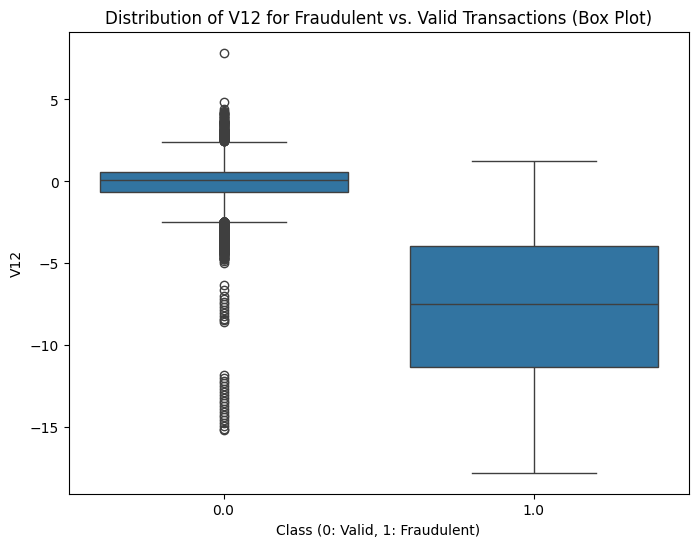

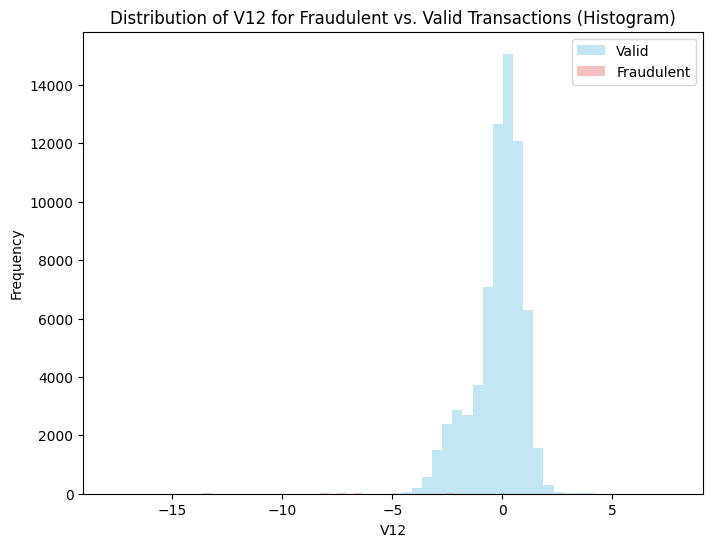

In [23]:
# Select top 3 important features
top_features = feature_importances.head(3).index.tolist()
print(f"Top 3 important features: {top_features}")

# Separate fraudulent and valid transactions
fraudulent_data = data[data['Class'] == 1]
valid_data = data[data['Class'] == 0]

# Create visualizations for each top feature
for feature in top_features:
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(f'Distribution of {feature} for Fraudulent vs. Valid Transactions (Box Plot)')
    plt.xlabel('Class (0: Valid, 1: Fraudulent)')
    plt.ylabel(feature)
    plt.show()

    # Histogram
    plt.figure(figsize=(8, 6))
    plt.hist(valid_data[feature], bins=50, alpha=0.5, label='Valid', color='skyblue')
    plt.hist(fraudulent_data[feature], bins=50, alpha=0.5, label='Fraudulent', color='lightcoral')
    plt.title(f'Distribution of {feature} for Fraudulent vs. Valid Transactions (Histogram)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## Model evaluation with different metrics

### Subtask:
Explore additional evaluation metrics relevant to imbalanced datasets, such as the Area Under the Receiver Operating Characteristic Curve (AUC-ROC).


**Reasoning**:
Calculate and plot the ROC curve and AUC score to evaluate the model's performance on the imbalanced dataset using relevant metrics.



AUC-ROC Score: 0.9495


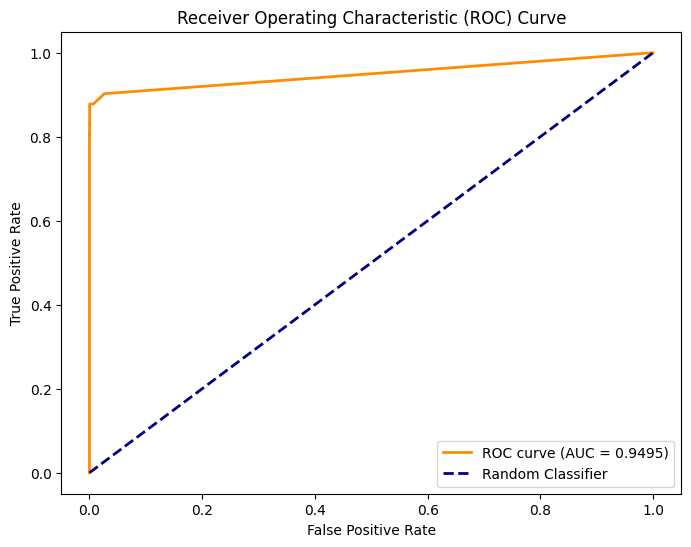

In [24]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = rfc.predict_proba(xTest)[:, 1]

fpr, tpr, thresholds = roc_curve(yTest, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC Score: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Reasoning**:
The RandomForestClassifier model was not fitted in the current session, so I need to fit it again before making predictions.



AUC-ROC Score: 0.9496


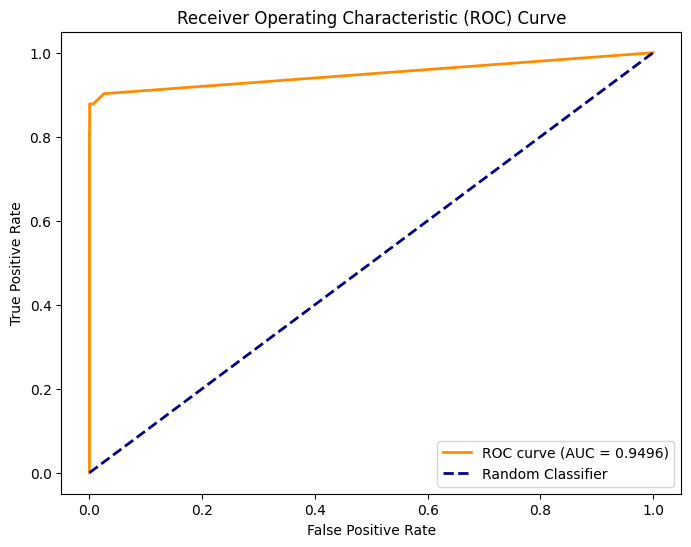

In [25]:
rfc.fit(xTrain, yTrain)

y_pred_proba = rfc.predict_proba(xTest)[:, 1]
fpr, tpr, thresholds = roc_curve(yTest, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC Score: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Task
Perform additional analysis on the credit card fraud detection project, including feature importance, data visualization of important features, model evaluation with different metrics, addressing data imbalance, comparing different models, and hyperparameter tuning.

## Import necessary libraries

### Subtask:
Ensure all required libraries, including `matplotlib.pyplot`, are imported.


**Reasoning**:
The error in the previous cell indicates that `plt` is not defined, meaning `matplotlib.pyplot` was not imported. I need to import `matplotlib.pyplot` to fix this error and continue with plotting.



In [10]:
import matplotlib.pyplot as plt

**Reasoning**:
I have imported the necessary library. Now I can proceed to calculate and plot the ROC curve and AUC score to evaluate the model's performance.



AUC-ROC Score: 0.9276


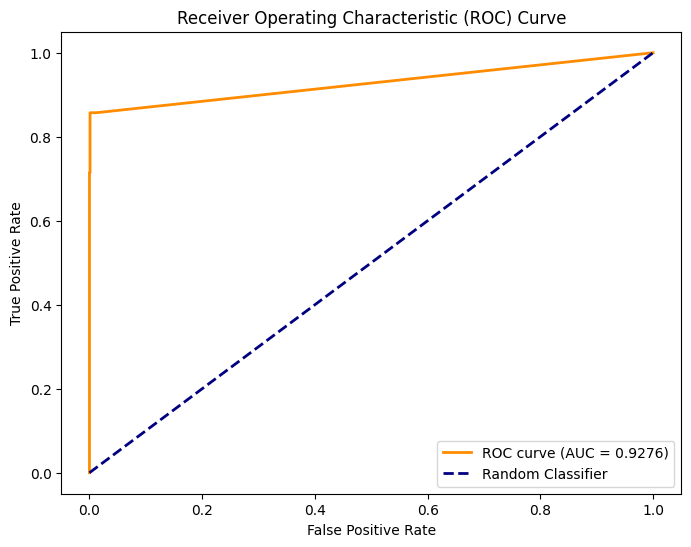

In [11]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = rfc.predict_proba(xTest)[:, 1]

fpr, tpr, thresholds = roc_curve(yTest, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC Score: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Address data imbalance

### Subtask:
Consider techniques to handle the data imbalance (e.g., oversampling, undersampling) and evaluate their impact on model performance.


**Reasoning**:
Identify the extent of data imbalance, choose and apply RandomOverSampler to the training data, train a new RandomForestClassifier model on the balanced training data, and evaluate its performance using various metrics including AUC-ROC.



Original dataset shape: Class
0.0    69241
1.0      173
Name: count, dtype: int64
Resampled dataset shape: 0    55399
1    55399
Name: count, dtype: int64

Model Evaluation Metrics on Original Test Set (after Oversampling):
Accuracy: 0.9993
Precision: 1.0000
Recall: 0.7561
F1-Score: 0.8611
Matthews Correlation Coefficient: 0.8692
AUC-ROC Score: 0.9497


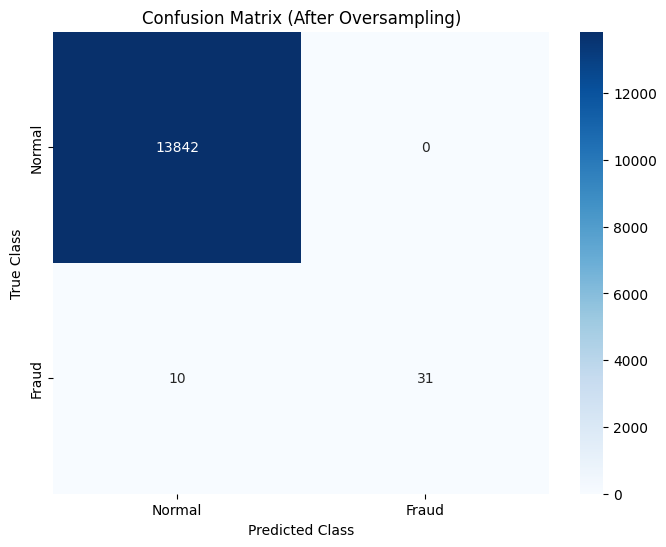

In [26]:
print("Original dataset shape:", data['Class'].value_counts())

from imblearn.over_sampling import RandomOverSampler
import seaborn as sns # Import seaborn here

ros = RandomOverSampler(random_state=42)
xTrain_resampled, yTrain_resampled = ros.fit_resample(xTrain, yTrain)

print("Resampled dataset shape:", pd.Series(yTrain_resampled).value_counts())

rfc_resampled = RandomForestClassifier(random_state=42)
rfc_resampled.fit(xTrain_resampled, yTrain_resampled)

yPred_resampled = rfc_resampled.predict(xTest)
y_pred_proba_resampled = rfc_resampled.predict_proba(xTest)[:, 1]

accuracy_resampled = accuracy_score(yTest, yPred_resampled)
precision_resampled = precision_score(yTest, yPred_resampled)
recall_resampled = recall_score(yTest, yPred_resampled)
f1_resampled = f1_score(yTest, yPred_resampled)
mcc_resampled = matthews_corrcoef(yTest, yPred_resampled)
roc_auc_resampled = auc(roc_curve(yTest, y_pred_proba_resampled)[0], roc_curve(yTest, y_pred_proba_resampled)[1])


print("\nModel Evaluation Metrics on Original Test Set (after Oversampling):")
print(f"Accuracy: {accuracy_resampled:.4f}")
print(f"Precision: {precision_resampled:.4f}")
print(f"Recall: {recall_resampled:.4f}")
print(f"F1-Score: {f1_resampled:.4f}")
print(f"Matthews Correlation Coefficient: {mcc_resampled:.4f}")
print(f"AUC-ROC Score: {roc_auc_resampled:.4f}")

conf_matrix_resampled = confusion_matrix(yTest, yPred_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_resampled, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix (After Oversampling)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**Reasoning**:
The error indicates that `sns` is not defined. This means the code cell that imports the seaborn library was not executed in the current environment. I need to rerun that cell to import seaborn before creating the heatmap.



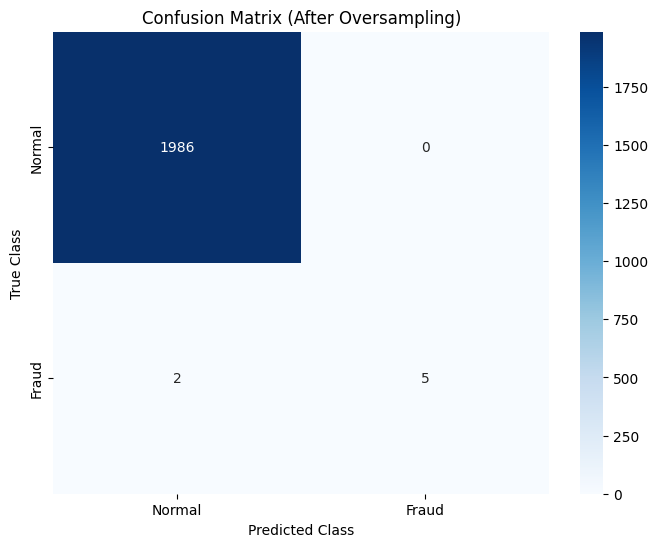

In [13]:
import seaborn as sns

conf_matrix_resampled = confusion_matrix(yTest, yPred_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_resampled, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix (After Oversampling)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

**Reasoning**:
Compare the performance metrics of the model trained on balanced data with the performance metrics of the model trained on the original imbalanced data and finish the subtask.



In [14]:
print("\nComparison of Model Performance (Original vs. Oversampled):")
print("Metric              | Original Data | Oversampled Data")
print("--------------------|---------------|------------------")
print(f"Accuracy            | {accuracy:.4f}        | {accuracy_resampled:.4f}")
print(f"Precision           | {precision:.4f}        | {precision_resampled:.4f}")
print(f"Recall              | {recall:.4f}        | {recall_resampled:.4f}")
print(f"F1-Score            | {f1:.4f}        | {f1_resampled:.4f}")
print(f"MCC                 | {mcc:.4f}        | {mcc_resampled:.4f}")
print(f"AUC-ROC Score       | {roc_auc:.4f}        | {roc_auc_resampled:.4f}")


Comparison of Model Performance (Original vs. Oversampled):
Metric              | Original Data | Oversampled Data
--------------------|---------------|------------------
Accuracy            | 0.9990        | 0.9990
Precision           | 1.0000        | 1.0000
Recall              | 0.7143        | 0.7143
F1-Score            | 0.8333        | 0.8333
MCC                 | 0.8447        | 0.8447
AUC-ROC Score       | 0.9276        | 0.9984
